In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.ndimage import filters
from skimage import img_as_float, exposure
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters.thresholding import threshold_otsu
from skimage import img_as_uint
import glob
import os
import imageio

In [2]:
#Carregando as imagens do diretorio data 
imagem = []
imagem2 = [] #LISTA EM PRETO E BRANCO E FLOAT 
nome = []
for filename in glob.glob('data/*.jpg'): 
    im = Image.open(filename)
    nome.append(im.filename)
    im = np.array(im)
    im = img_as_float(im) 
    imagem.append(im)
    im2 = Image.open(filename).convert('L') #
    im2 = np.array(im2)
    im2 = img_as_float(im2)
    imagem2.append(im2)

In [3]:
# Imprimindo informacoes de dimensoes, tamanho, tipo de dado menor e maior intensidade
for i  in range(len(imagem)):
    print ('Imagem : '+str (i)) 
    print ('Dimensoes: ' + str(imagem[i].ndim))
    print ('Tamanho:'+ str(imagem[i].shape))
    print ('Tipo de Dados:' +str (imagem[i].dtype))
    print ('Menor Intensidade %.4f'% imagem[i].min())
    print ('Maior Intensidade %.4f'% imagem[i].max())
    print('________________________________')

Imagem : 0
Dimensoes: 3
Tamanho:(800, 597, 3)
Tipo de Dados:float64
Menor Intensidade 0.0000
Maior Intensidade 0.8078
________________________________
Imagem : 1
Dimensoes: 3
Tamanho:(597, 800, 3)
Tipo de Dados:float64
Menor Intensidade 0.0000
Maior Intensidade 1.0000
________________________________
Imagem : 2
Dimensoes: 3
Tamanho:(800, 597, 3)
Tipo de Dados:float64
Menor Intensidade 0.0000
Maior Intensidade 1.0000
________________________________
Imagem : 3
Dimensoes: 3
Tamanho:(800, 597, 3)
Tipo de Dados:float64
Menor Intensidade 0.0000
Maior Intensidade 1.0000
________________________________
Imagem : 4
Dimensoes: 3
Tamanho:(800, 597, 3)
Tipo de Dados:float64
Menor Intensidade 0.0000
Maior Intensidade 0.9490
________________________________
Imagem : 5
Dimensoes: 3
Tamanho:(800, 600, 3)
Tipo de Dados:float64
Menor Intensidade 0.0000
Maior Intensidade 0.7608
________________________________
Imagem : 6
Dimensoes: 3
Tamanho:(800, 600, 3)
Tipo de Dados:float64
Menor Intensidade 0.0000
M

In [4]:
# Aplicando media 3 
masc_3 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=float)
    
masc_3 = masc_3 / 9

imagemMedia = [] #Salvando media 3 em imagemMedia 
for i  in range(len(imagem2)):
    media_3 = filters.convolve(imagem2[i], masc_3)
    imagemMedia.append(media_3)

In [5]:
sob_h = np.array([[-1., -2., -1.],
                  [ 0.,  0.,  0.],
                  [ 1.,  2.,  1.]], dtype=float)

sob_v = np.array([[-1.,  0.,  1.],
                  [-2.,  0.,  2.],
                  [-1.,  0.,  1.]], dtype=float)

In [6]:
#aplicando gradiente sobel
imagemSobel = [] #salvando as imagens com aplicação sobel
for i  in range(len(imagem2)):
    im_sob_h  = filters.convolve(imagemMedia[i], sob_h)
    im_sob_v  = filters.convolve(imagemMedia[i], sob_v)
    # Magnitude do gradiente (hipotenusa)
    im_sob = np.sqrt(im_sob_h**2 + im_sob_v**2)
    imagemSobel.append(im_sob)

In [7]:
# EQUALIZAÇÃO DO HISTOGRAMA 
imagemEQ = []
for i  in range(len(imagem2)):
    im1_eq = exposure.equalize_hist(imagemMedia[i])
    imagemEQ.append(im1_eq)

In [8]:
# EQUALIZAÇÃO DO HISTOGRAMA 
imagemOtsu = []
for i  in range(len(imagem2)):
    im_otsu = im1_eq > threshold_otsu(imagemMedia[i])
    imagemOtsu.append(im_otsu)

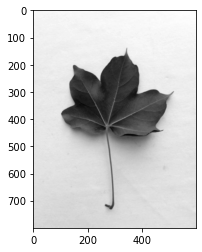

In [9]:
plt.imshow(imagemMedia[2] , cmap='gray')

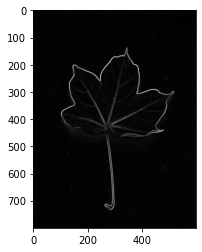

In [10]:
plt.imshow(imagemSobel[2] , cmap='gray')

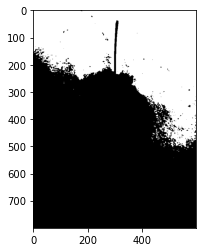

In [11]:
plt.imshow(imagemOtsu[2] , cmap='gray')

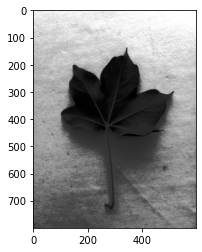

In [12]:
plt.imshow(imagemEQ[2] , cmap='gray')

In [ ]:
#salvar as saidas
type(imagemEQ)

for i  in range(len(imagem2)):
    filename = 'out/' + nome[i][5:-4] + '_eqhist.jpg'
    imageio.imwrite(filename, imagemEQ[i])
    
    filename = 'out/' + nome[i][5:-4] + '_sobel.jpg'
    imageio.imwrite(filename, imagemSobel[i])
    
    filename = 'out/' + nome[i][5:-4] + '_otusu.jpg'
    imageio.imwrite(filename, imagemOtsu[i])